## OSM Bootcamp 2018 Exercise Set 1


#### John Stachurski

### Exercise 1

Let $X$ be an $n \times n$ matrix with all positive elements.  The spectral radius $r(X)$ of $X$ is maximum of $|\lambda|$ over all eigenvalues $\lambda$ of $X$, where $|\cdot|$ is the modulus of a complex number.

A version of the **local spectral radius theorem** states that if $X$ has all positive entries and $v$ is any strictly positive $n \times 1$ vector, then

$$
    \lim_{i \to \infty} \| X^i v \|^{1/i} \to r(X) 
    \qquad \qquad \text{(LSR)}
$$

where $\| \cdot \|$ is the usual Euclidean norm.

Intuitively, the norm of the iterates of a positive vector scale like $r(X)$ asymptotically.

The data file `matrix_data.txt` contains the data for a single matrix $X$.  

1. Read it in and compute the spectral raduis using the tools for working with eigenvalues in `scipy.linalg`.

2. Test the claim in (LSR) iteratively, computing $\| X^i v \|^{1/i}$ for successively larger values of $i$.  See if the sequence so generated converges to $r(A)$.

In [4]:
from scipy.linalg import eigvals
from scipy.spatial.distance import cdist
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
f = open('matrix_data.txt', 'r')
data = [[float(num) for num in line.split(' ')] for line in f]
rA = np.max(abs(eigvals(data))) # The modulus of complex eigenvectors
maxiter = 30000
tolerance = 1e-60
iterat = 1
power = 1
data = np.array(data)
v = np.ones(len(data[:, 0]))
step = 1
while step > tolerance and iterat < maxiter:
    rX = np.linalg.norm(np.matmul(np.linalg.matrix_power(data, power), np.transpose(v))) ** (1 / power)
    step = abs(rA - rX)
    power += power
    iterat += iterat
print("r(A)\t\t", rA)
print("r(X)\t\t", rX)
print("Iteration:\t", iterat)

Thus it converges iteratively.



### Exercise 2

Recall that the quadratic map generates time series of the form

$$ x_{t+1} = 4 \, x_t (1 - x_t) $$

for some given $x_0$, and that these trajectories are chaotic.

This means that different initial conditions generate seemingly very different outcomes.

Nevertheless, the regions of the state space where these trajectories spend most of their time are in fact typically invariant to the initial condition.

Illustrate this by generating 100 histograms of time series generated from the quadratic map, with $x_0$ drawn independently from the uniform distribution on $(0, 1)$.  

Do they all look alike?

Try to make your code efficient.



In [81]:
from numba import vectorize, jit, njit, float64, prange

@njit
def my_func():
    matrixiter = np.empty((100, 100_000))
    for i in range(100):
        xiterations = np.empty(100_000)
        xiterations[0] = np.random.uniform(0, 1)
        for j in range(100_000 - 1):
            xiterations[j + 1] = 4 * xiterations[j] * (1 - xiterations[j])
        matrixiter[i, :] = xiterations
        #print(xiterations.reshape(10,1))
        #print(xiterations.shape)
        #print(matrixiter.shape)
    return matrixiter

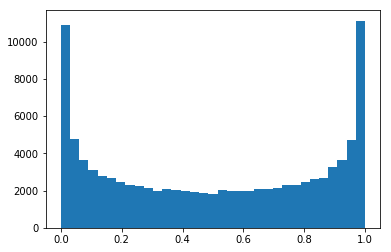

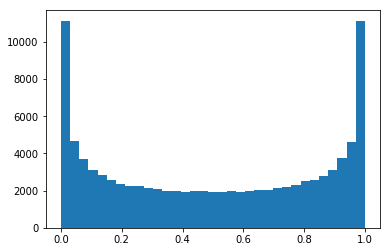

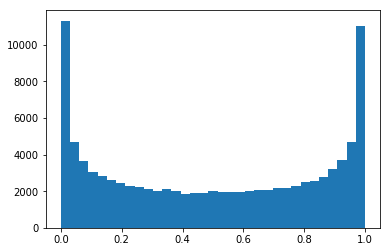

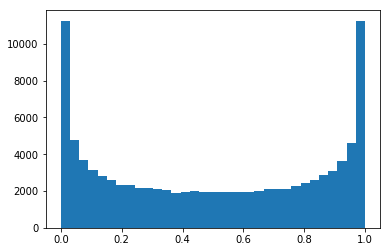

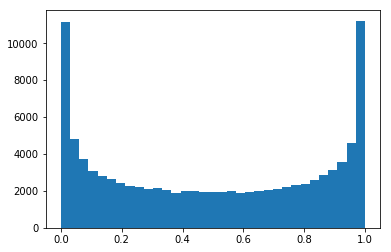

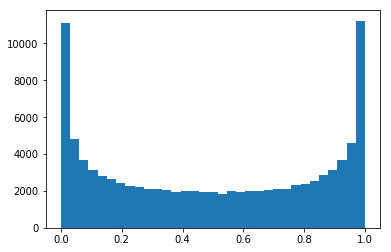

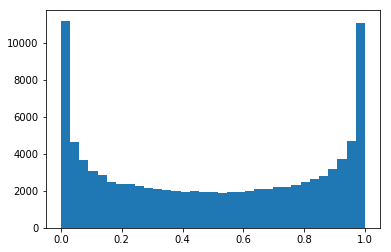

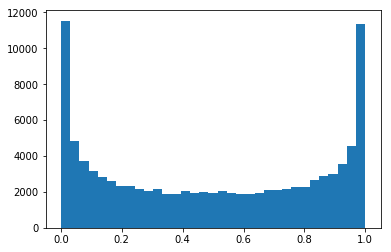

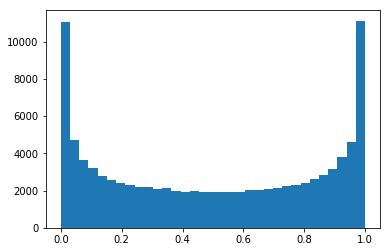

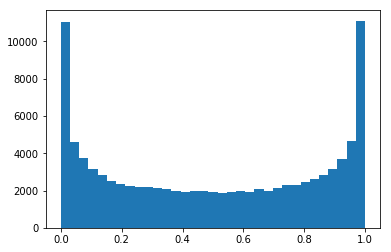

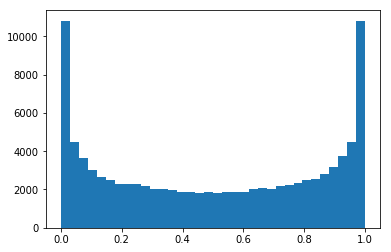

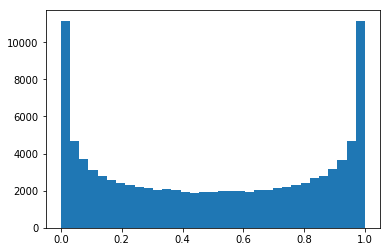

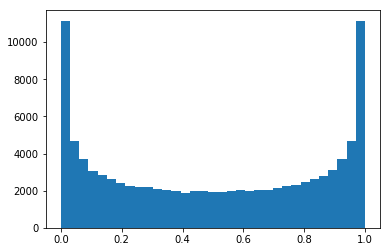

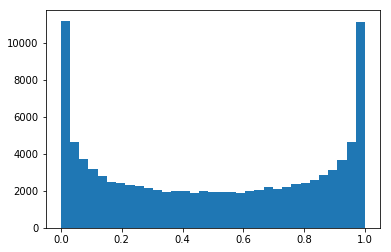

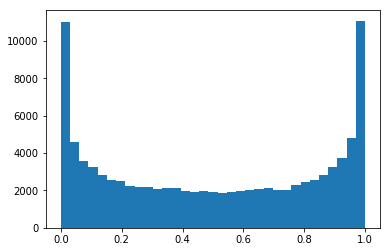

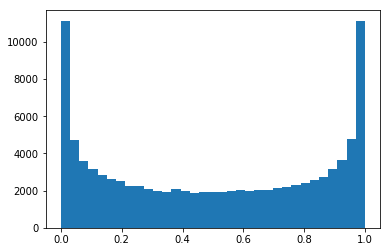

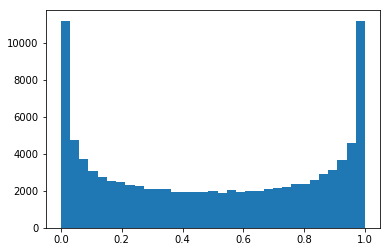

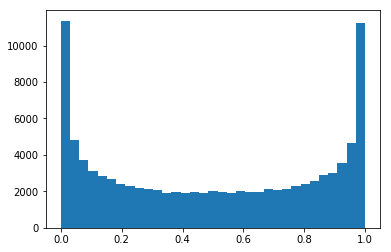

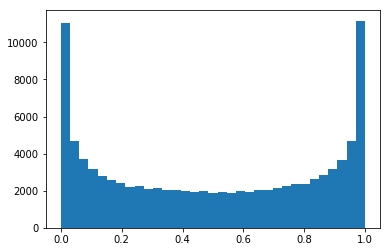

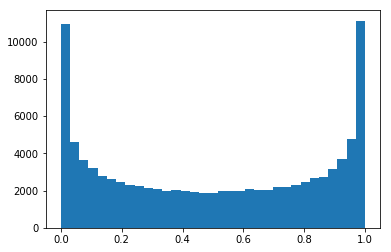

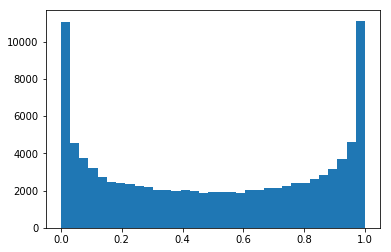

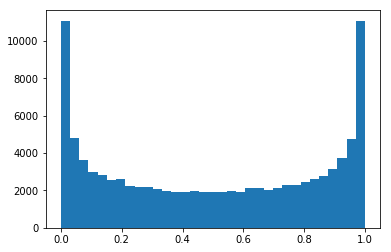

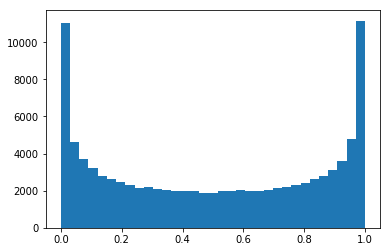

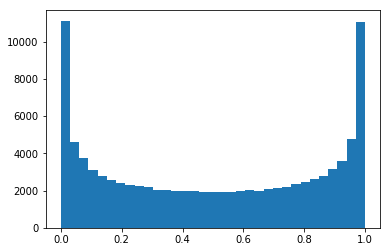

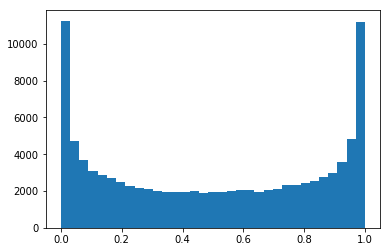

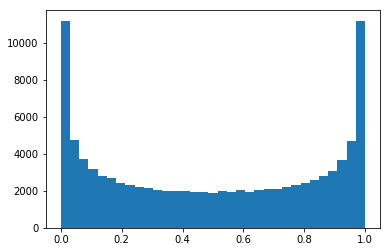

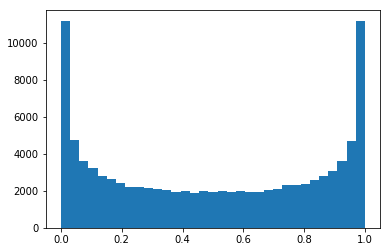

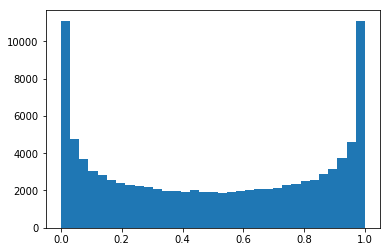

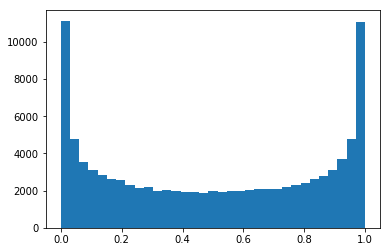

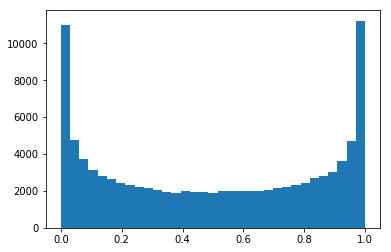

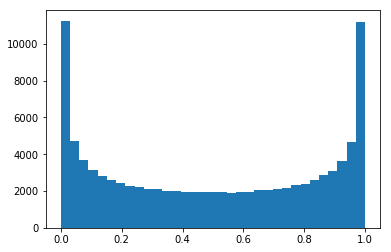

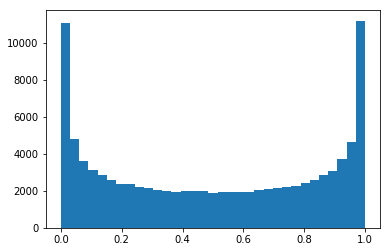

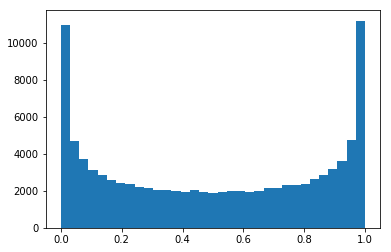

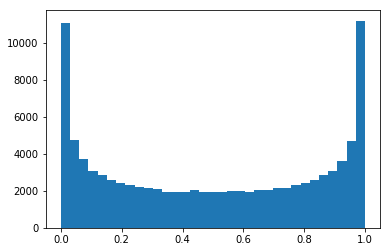

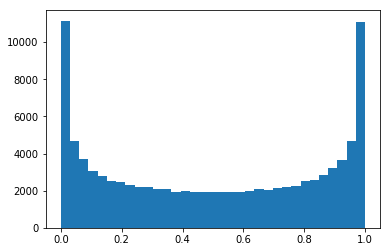

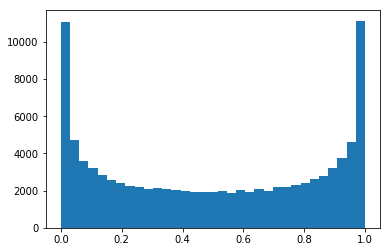

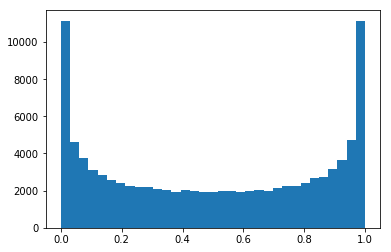

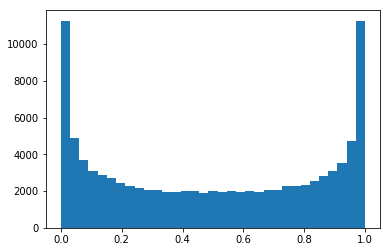

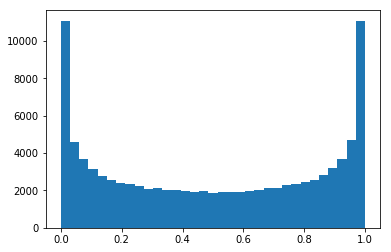

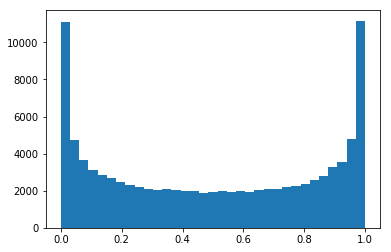

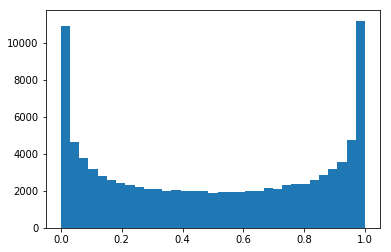

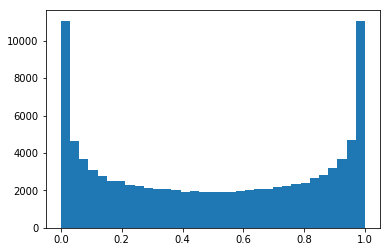

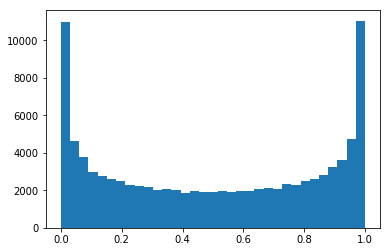

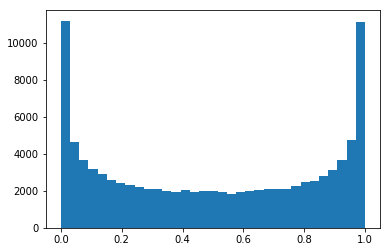

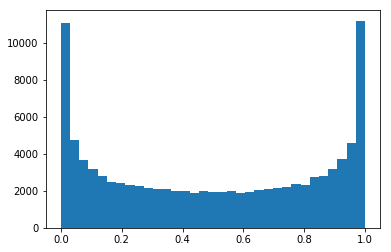

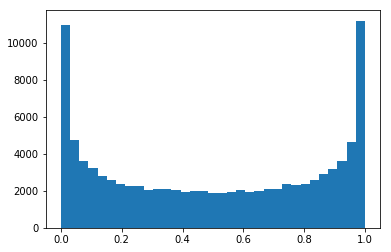

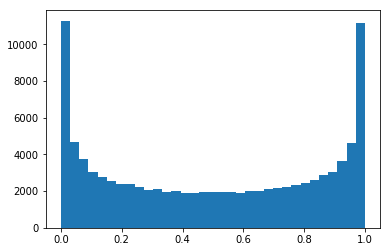

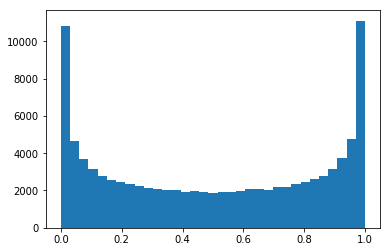

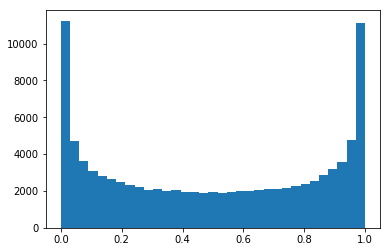

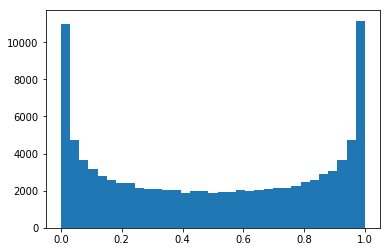

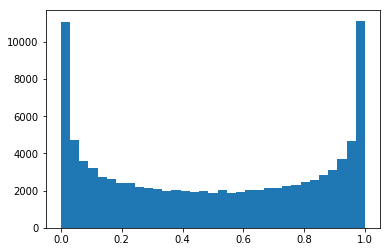

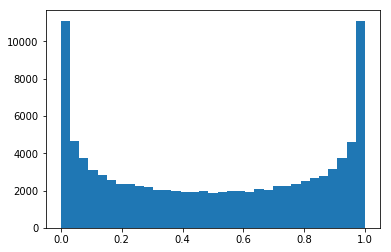

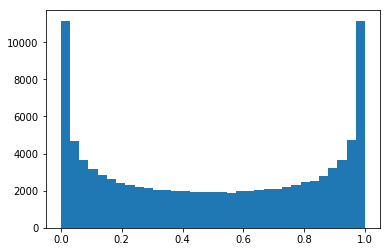

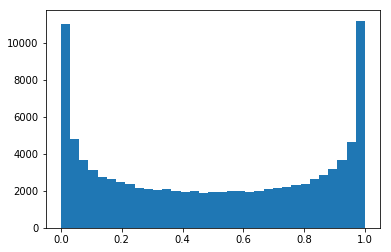

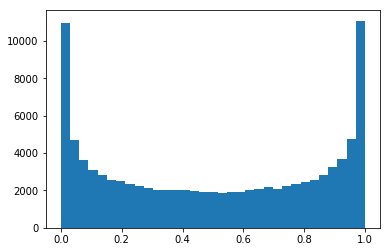

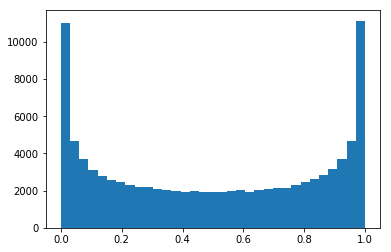

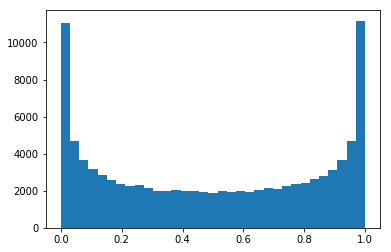

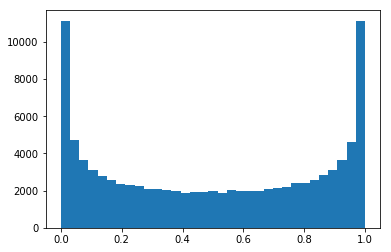

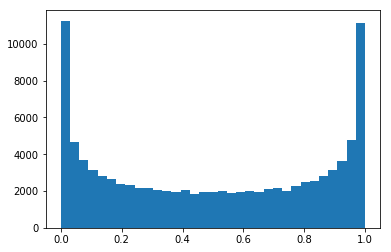

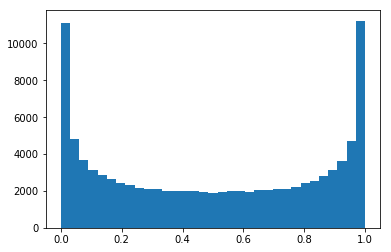

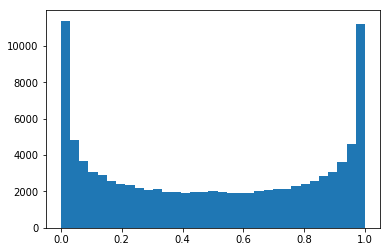

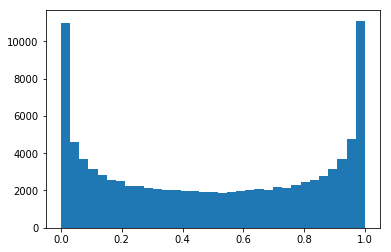

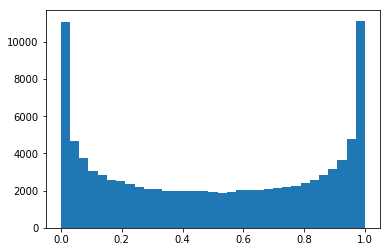

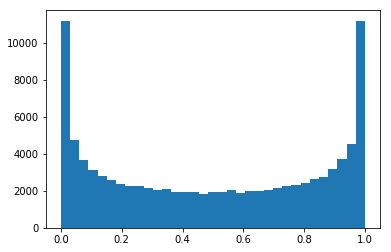

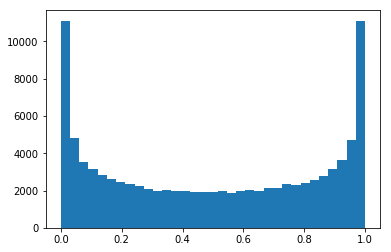

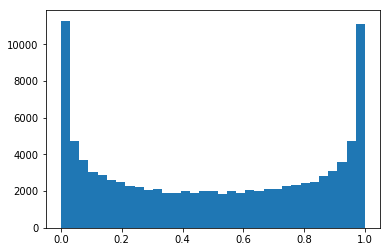

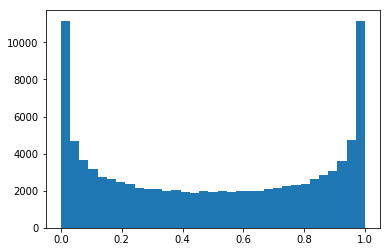

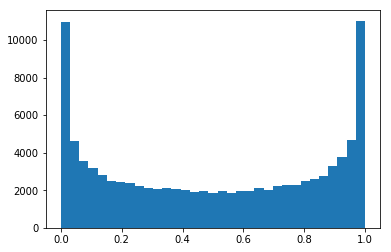

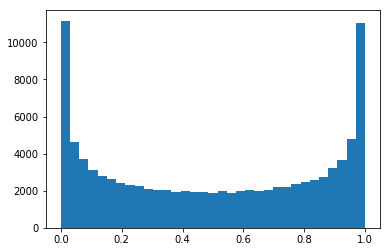

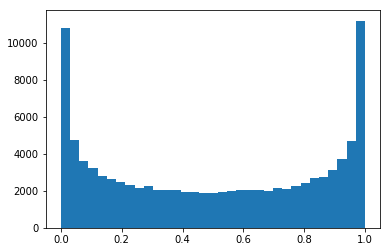

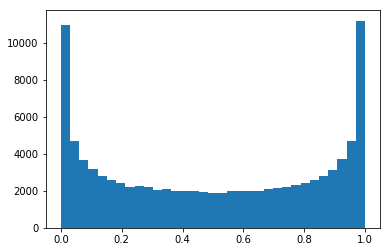

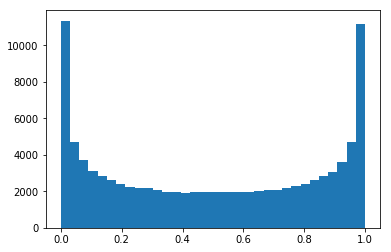

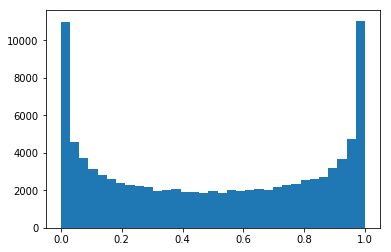

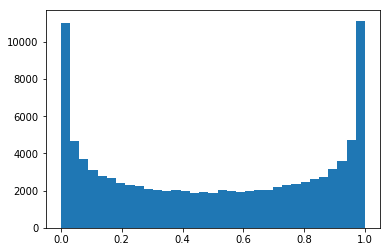

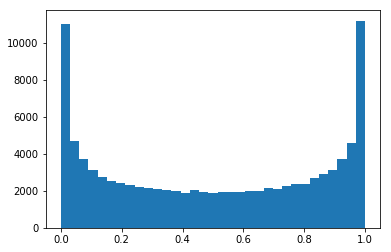

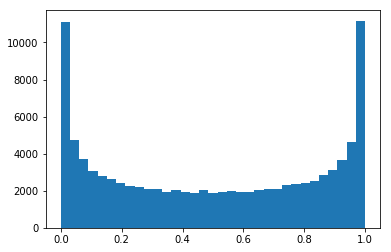

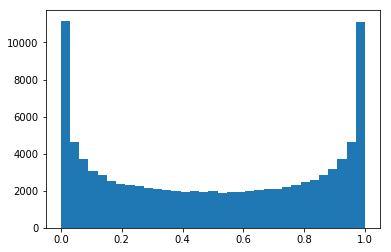

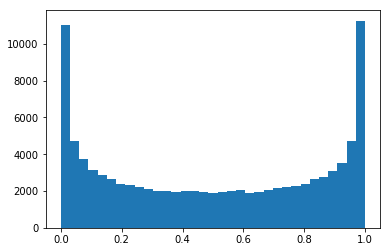

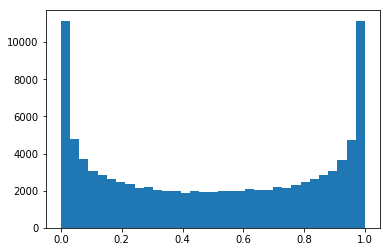

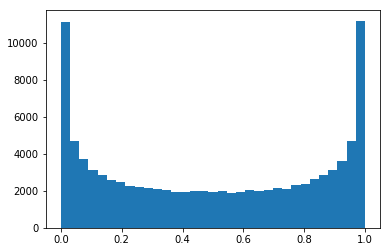

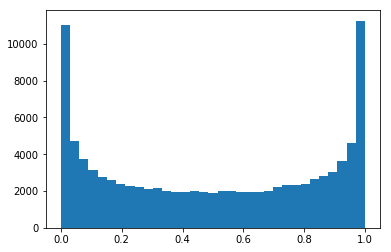

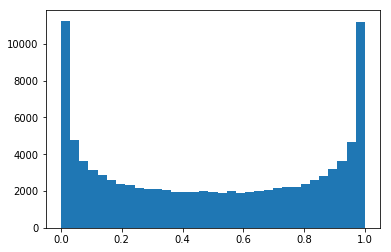

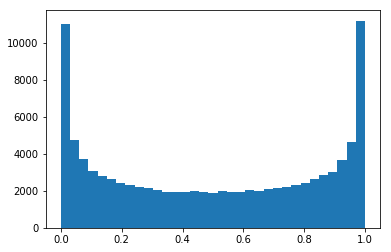

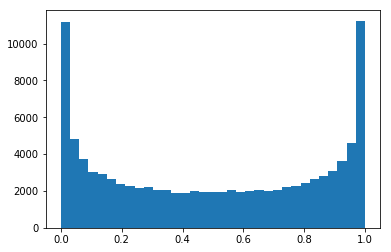

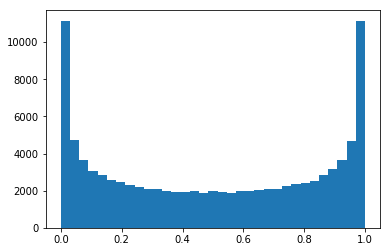

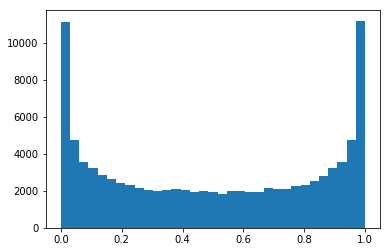

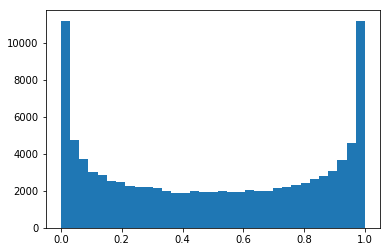

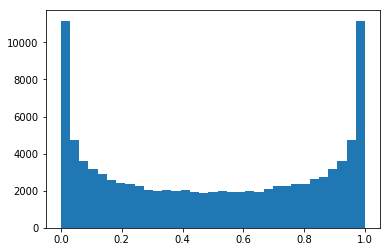

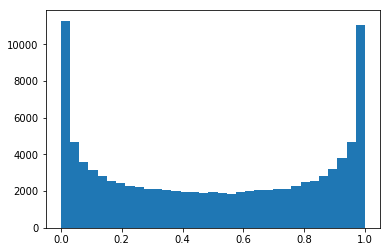

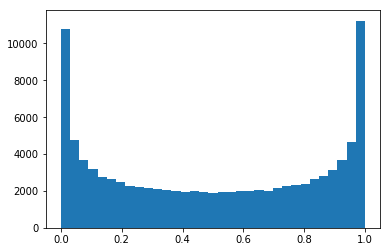

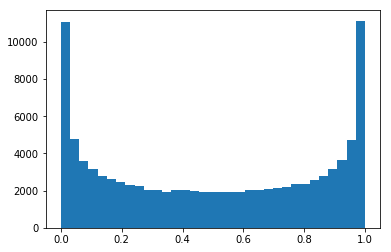

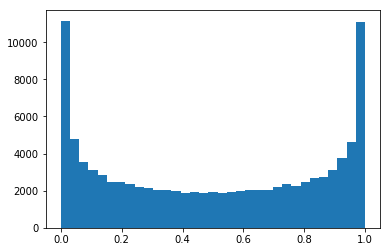

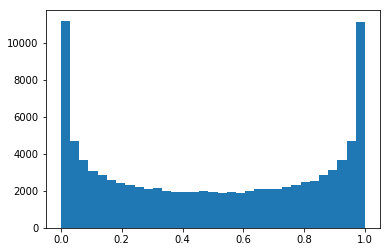

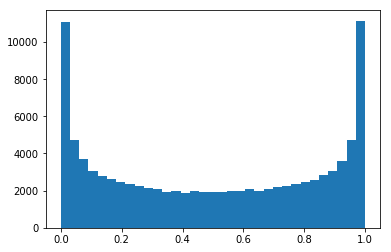

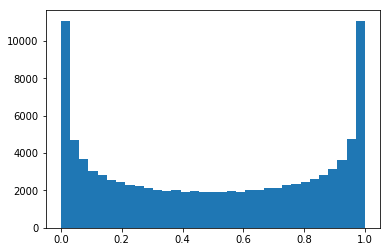

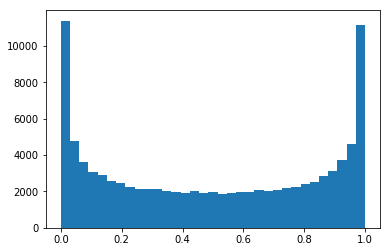

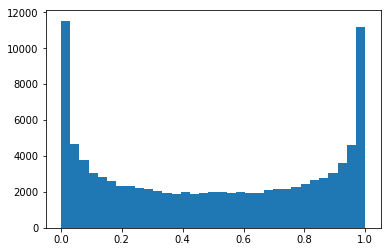

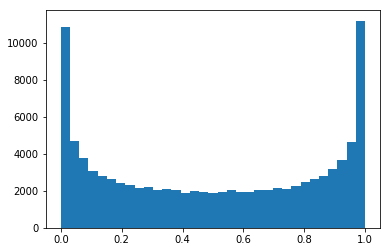

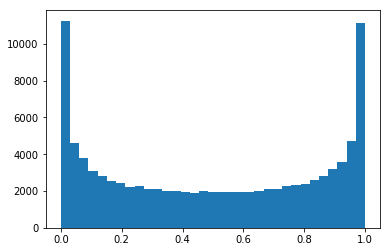

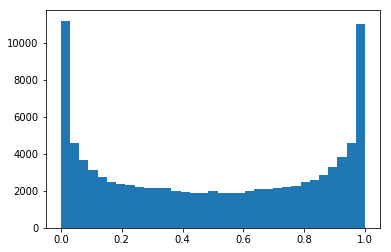

In [82]:
matrixiterations = my_func()
#print(matrixiterations)
for i in range(len(matrixiterations)):
    plt.hist(matrixiterations[i, :], bins='auto') 
    plt.show()


### Exercise 3

In the lecture it was claim that, if $(\mathbb X, g)$ is a dynamical system, $g$ is continuous at $\hat x \in \mathbb X$ and, for some $x \in \mathbb X$, $g^t(x) \to \hat x$, then $\hat x$ is a steady state of $(\mathbb X, g)$.

Prove this.

 Let $(\mathbb X,g)$ be a dynamical system, and let $g$ be continuous at $\hat{x} \in \mathbb X$ and, for some $x \in \mathbb X$ where $g^t(x) \rightarrow \hat x$.  Let a sequence $a_t: g^{t-1}(x)$.  Notice that $g(a_t) = g^t(x) = a_{t+1}$.  So by definition of limits and $g^t(x) \rightarrow \hat{x}$.  Therefore, $\text{lim}_{a_t} = \hat{x}$.  So, $\hat{x} = \text{lim}_{t \rightarrow \infty} g^t(x) = \text{lim}_{t \rightarrow \infty}g^t(a_t) = g(\text{lim}_{t \rightarrow \infty} a_t) = g(\hat{x})$ . We can pass in the limit because $g$ is continuous.

## Homework 2


### Exercise 1

In [9]:
from scipy import stats
import numpy as np
from numpy import random as rand
import matplotlib.pyplot as plt


class KDE:
    """test"""
    def __init__(self, X, bandwidth=None):
        """Test"""
        self.X = X
        if not bandwidth:
            self.bandwidth = 1.06*np.sqrt(np.var(X))*(len(X) ** (-0.2))
        else:
            self.bandwidth = bandwidth
        self.n = len(X)
        self.sigma = np.var(X)
    
    def density(self, x):
        """test"""
        f_x = np.empty(len(x))
        for j in range(len(x)):
            z = np.zeros(len(self.X))
            for i in range(self.n):
                z[i] = stats.norm.pdf((x[j] - self.X[i]) / self.bandwidth)
            f_x[j] = (1 / (self.bandwidth*self.n) * np.sum(z))
        return f_x
        

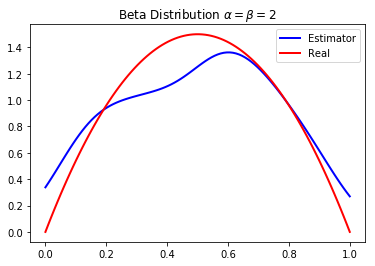

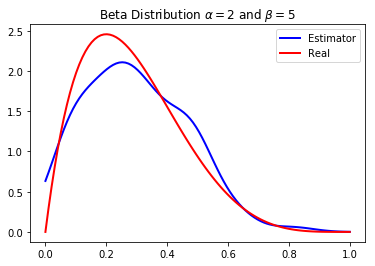

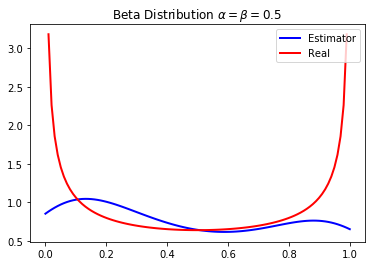

In [78]:
# Use the beta distribution to test the class

grid = np.linspace(0, 1, 100)

X_1 = rand.beta(2, 2, 100)
X_2 = rand.beta(2, 5, 100)
X_3 = rand.beta(.5, .5, 100)

beta_1 = KDE(X_1)
output_1 = beta_1.density(grid)
plt.plot(grid, output_1, 'b' , lw = 2, label = "Estimator")
plt.plot(grid, stats.beta.pdf(grid, 2, 2), 'r', lw = 2, label = "Real")
plt.title(r"Beta Distribution $\alpha = \beta = 2$")
plt.legend(loc= "upper right")
plt.show()

beta_2 = KDE(X_2)
output_2 = beta_2.density(grid)
plt.plot(grid, output_2, 'b' , lw = 2, label = "Estimator")
plt.plot(grid, stats.beta.pdf(grid, 2, 5), 'r', lw = 2, label = "Real")
plt.title(r"Beta Distribution $\alpha = 2$ and $\beta = 5$")
plt.legend(loc= "upper right")
plt.show()

beta_3 = KDE(X_3)
output_3 = beta_3.density(grid)
plt.plot(grid, output_3, 'b' , lw = 2, label = "Estimator")
plt.plot(grid, stats.beta.pdf(grid, 0.5, 0.5), 'r', lw = 2, label = "Real")
plt.title(r"Beta Distribution $\alpha = \beta = 0.5$")
plt.legend(loc= "upper right")
plt.show()



This isn't a good estimator of these distributions. Especially when alpha and beta are equal to 0.5.  **************************  ALSO COMMENT CODE

### Exercise 2

In [82]:
import matplotlib.mlab as mlab
import math
from numpy import random as rand
plt.style.use('seaborn-darkgrid')

rho = 0.9
beta = 0.0
sigma = 0.1
mu = -3
s = 0.2

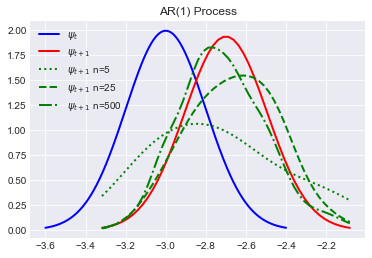

In [94]:
grid_1 = np.linspace(mu - 3*s, mu + 3*s, 1000)
psi_1 = mlab.normpdf(grid_1, mu, s)
s_2 = np.sqrt(rho ** 2 * s ** 2 + sigma ** 2)
mu_2 = rho * mu + beta
grid_2 = np.linspace(mu_2 - 3 * s_2, mu_2 + 3*s_2)
psi_2 = mlab.normpdf(grid_2, mu_2, s_2)
plt.plot(grid_1, psi_1, 'b' , lw = 2, label = "$\psi_{t}$")
plt.plot(grid_2, psi_2, 'r', lw = 2, label = "$\psi_{t + 1}$")


n = 5
xi = rand.normal(0, 1, n)
draws_1 = rand.normal(mu, s, n)
draws_2 = rho * draws_1 + beta + sigma * xi
density_est = KDE(draws_2)
output = density_est.density(grid_2)
plt.plot(grid_2, output, 'g:' , lw = 2, label = "$\psi_{t + 1}$ n=5")

n = 25
xi = rand.normal(0, 1, n)
draws_1 = rand.normal(mu, s, n)
draws_2 = rho * draws_1 + beta + sigma * xi
density_est = KDE(draws_2)
output = density_est.density(grid_2)
plt.plot(grid_2, output, 'g--' , lw = 2, label = "$\psi_{t + 1}$ n=25")

n = 500
xi = rand.normal(0, 1, n)
draws_1 = rand.normal(mu, s, n)
draws_2 = rho * draws_1 + beta + sigma * xi
density_est = KDE(draws_2)
output = density_est.density(grid_2)
plt.plot(grid_2, output, 'g-.' , lw = 2, label = "$\psi_{t + 1}$ n=500")
plt.legend(loc= "upper left")
plt.title("AR(1) Process")
plt.show()

###COMMENT CODE!!!!

### Exercise 3

Proof:  We know that $\forall \epsilon > 0$, $\exists \mathbb{N s.t.} \forall k > \mathbb{N},  || \:||A^K||^{\frac{1}{K}} - r(A) || < \epsilon$.  Thus, $(\epsilon - r(A))^K < ||A^K|| < (\epsilon + r(A))^K$.  When we take this last equation to the limit, as $K  \rightarrow \infty$  Then we see that $(\epsilon \pm r(A))^K$ beause $r(A) < 1$ therefore $r(A)^K$ will go to zero as $K \rightarrow \infty$  Thus, $\exists \mathbb{N s.t.} \forall K >  \mathbb{N} ||A^K|| < \epsilon$ . 

## Homework 3:

### Exercise 1:


In [2]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.220, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.210, 0.194, 0.090, 0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.040, 0.009],
     [0.175, 0.178, 0.197, 0.207, 0.110, 0.067, 0.054, 0.012],
     [0.182, 0.184, 0.200, 0.205, 0.106, 0.062, 0.050, 0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.170, 0.143, 0.121, 0.028]]

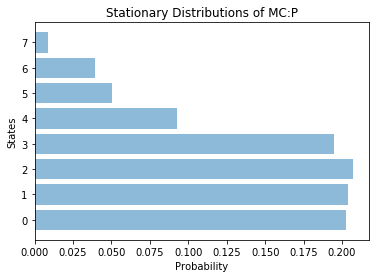

In [36]:
mc = qe.MarkovChain(P)
stat_dist = mc.stationary_distributions
plt.barh(range(len(stat_dist[0])), stat_dist[0], align='center', alpha=0.5)
plt.ylabel("States")
plt.xlabel("Probability")
plt.title("Stationary Distributions of MC:P")
plt.show()

### Exercise 2

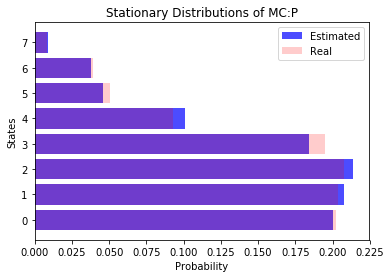

In [75]:
def estimate_mc(mc, n=1000):
    """Estimate the Markov Chain's stationary distribution by passing in a 
    markov chain and the number of times to simulate the path.  This
    estimates the markov chain by simulating a path n long.  It then counts up
    each state it existed and divides by n for the probability of being in that state."""
    ts_length = n
    init = 1
    X = mc.simulate_indices(ts_length, init)
    zeros = sum([1 for x in X if x == 0])
    ones = sum([1 for x in X if x == 1])
    twos = sum([1 for x in X if x == 2])
    threes = sum([1 for x in X if x == 3])
    fours = sum([1 for x in X if x == 4])
    fives = sum([1 for x in X if x == 5])
    sixes = sum([1 for x in X if x == 6])
    sevens = sum([1 for x in X if x == 7])
    states_amount = [zeros, ones, twos, threes, fours, fives, sixes, sevens] 
    states = [x / n for x in states_amount]
    return states

mc = qe.MarkovChain(P)
states_est = estimate_mc(mc)
plt.barh(range(len(P)), states_est,color='b', align='center', alpha=0.7, label="Estimated")
plt.barh(range(len(stat_dist[0])), stat_dist[0], color='r', align='center', alpha=0.2, label='Real')
plt.ylabel("States")
plt.xlabel("Probability")
plt.title("Stationary Distributions of MC:P")
plt.legend()
plt.show()

This is similar to the stationary distribution I computed in exercise 1.
After talking to some other people's code I realize that my method of counting the amount of each states in the path is ineffecient.  Rebekah showed me np.unique which would be much more effective. 

### Exercise 3

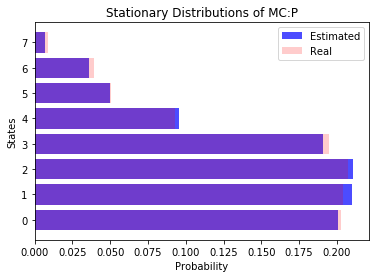

In [89]:
def ergodicity(mc, n=10_000, T=10_000):
    """Uses Ergodicity to find stationary distribution.  This will run the number of 
    paths n times for some number of cross sections T, where T is suitably large"""
    cross = np.empty((n))
    ts_length = T
    init = 1
    for i in range(n):
        X = mc.simulate_indices(ts_length, init)
        cross[i] = X[T - 1]
    zeros = sum([1 for x in X if x == 0])
    ones = sum([1 for x in X if x == 1])
    twos = sum([1 for x in X if x == 2])
    threes = sum([1 for x in X if x == 3])
    fours = sum([1 for x in X if x == 4])
    fives = sum([1 for x in X if x == 5])
    sixes = sum([1 for x in X if x == 6])
    sevens = sum([1 for x in X if x == 7])
    states_amount = [zeros, ones, twos, threes, fours, fives, sixes, sevens] 
    states = [x / n for x in states_amount]
    return states

ergo = ergodicity(mc)
plt.barh(range(len(P)), ergo, color='b', align='center', alpha=0.7, label="Estimated")
plt.barh(range(len(stat_dist[0])), stat_dist[0], color='r', align='center', alpha=0.2, label='Real')
plt.ylabel("States")
plt.xlabel("Probability")
plt.title("Stationary Distributions of MC:P")
plt.legend()
plt.show()

This produces a similar plot to the stationary distribution. 